In [89]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
# loading data
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Data Understanding

In [91]:
class dataUnderstanding(object):
      
      """ A class that does basic data understanding"""

      def __init__(self, df):
        self.info = df.info
        self.shape = df.shape
        self.describe = df.describe()
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes

In [92]:
# instantiate the class
understanding = dataUnderstanding(df)

In [93]:
# shape of the dataset
print(f"shape:{understanding.shape}")

shape:(21597, 21)


There are 21597 rows and 21 columns

In [94]:
# info
print(understanding.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [95]:
# checking for duplicates
print(f"duplicates;{understanding.duplicates}")

duplicates;0


There are no duplicates

In [96]:
#checking for the missng values
print(understanding.types)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [97]:
understanding.missing

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are 2376 missing values in waterfront column, 63 in the view column and 3842 in the yr_renovated column

### Data Preparation

#### 2.1 Completeness
Taking care of missing values


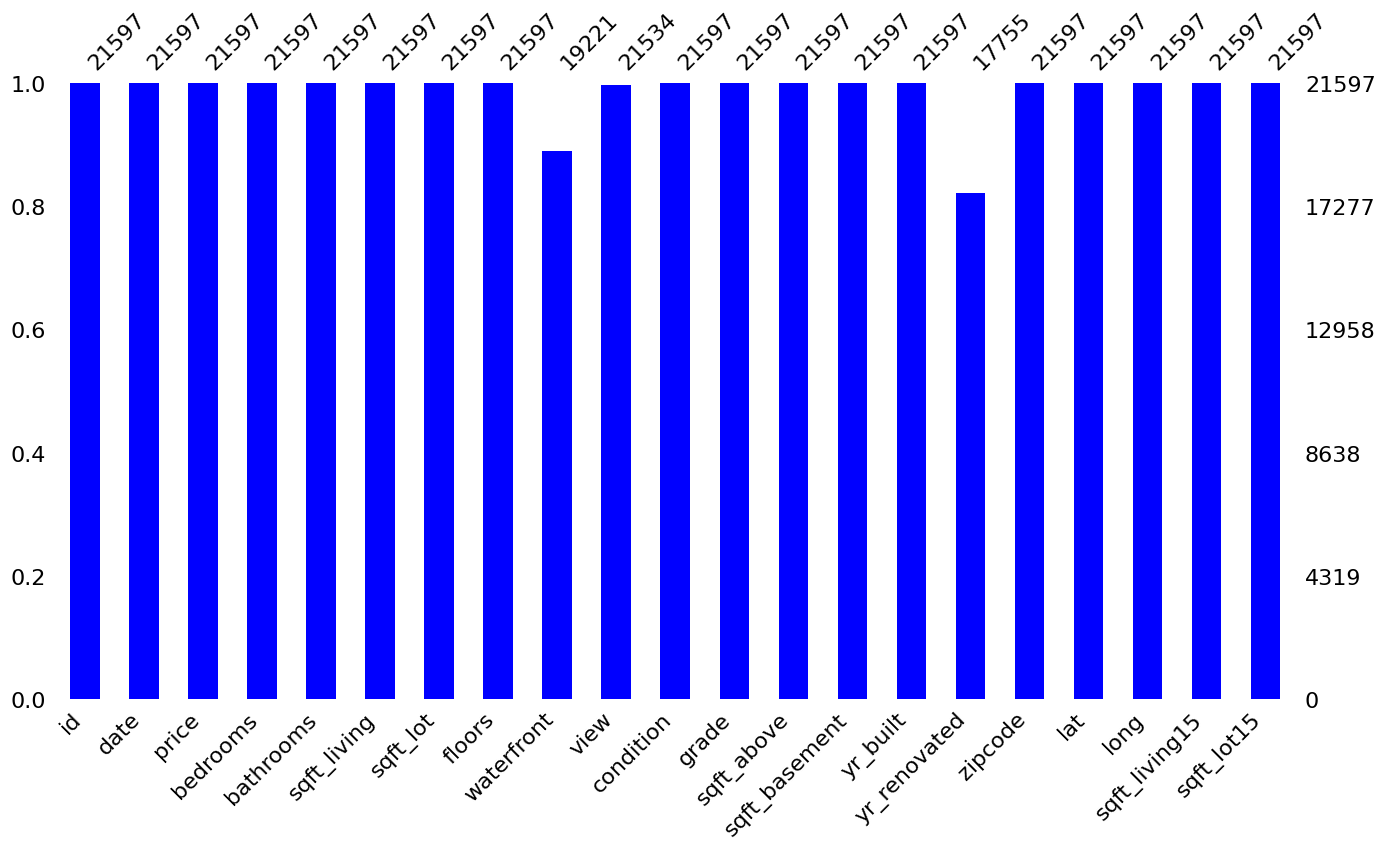

In [98]:
import missingno as msno
import seaborn as sns
pd.set_option("display.max_columns", 21)
fig, ax = plt.subplots(figsize=(16,8))
msno.bar(df=df, color="blue", ax=ax)
# plt.suptitle("Percentage Completeness")
plt.show()

In [99]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [100]:
# handling null values in waterfront column
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
df["waterfront"]=imp.fit_transform(df[["waterfront"]])

In [101]:
#inspecting value counts of view column
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [102]:
# handling null values in the view column
imp = SimpleImputer(strategy='most_frequent')
df["view"]=imp.fit_transform(df[["view"]])

In [103]:
#inspecting valuecounts of yr renovated column
df['yr_renovated'].value_counts()


0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [104]:
# removing null values in yr renovated column
df['yr_renovated']=df['yr_renovated'].fillna(value=0)

In [105]:
understanding=dataUnderstanding(df)
understanding.missing

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values

#### 2.2 Validity
 We will be checking if data is in the correct format

In [106]:
# dropping the id column 
df.drop('id', axis=1, inplace=True)

In [107]:
df['view'].astype('category')
type('view')

str

In [108]:
# cast condition as category
df['condition']=df['condition'].astype('category')
type('condition')

str

In [109]:
# correct date type
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [110]:
df['year'] = (df['date']).dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015


In [111]:
df['date'].dt.month

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: date, Length: 21597, dtype: int64

In [112]:
#dictionary that maps months to their season
seasons = {1:'Winter',
           2:'Winter',
           3:'Spring',
           4:'Spring',
           5:'Spring',
           6:'Summer',
           7:'Summer',
           8:'Summer',
           9:'Fall',
           10:'Fall',
           11:'Fall',
           12:'Winter'}

# Create a new column that contains the season that the movie was released in
df['season'] = df['date'].dt.month.map(seasons)

df.head() # Preview the updated 'release_time_df' DataFrame

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,Fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,Winter
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,Winter
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,Winter
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,Winter


In [113]:
area= df[['sqft_living','sqft_above', 'sqft_basement']]
area

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
...,...,...,...
21592,1530,1530,0.0
21593,2310,2310,0.0
21594,1020,1020,0.0
21595,1600,1600,0.0


So we can drop sqft_above and sqft -basement


In [114]:
# Drop columns 'sqft_above' and 'sqft_basement'
df = df.drop(columns=['sqft_above', 'sqft_basement', 'sqft_living15'])

# Print the updated dataframe
print(df)

            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors waterfront  view  condition          grade  yr_built  \
0         1.0         NO  NONE    Average

In [115]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [116]:
df['grade'].replace(to_replace =('11 Excellent', '12 Luxury', '13 Mansion', '10 Very Good'),
                                      value ='Good', inplace=True)
df['grade'].replace(to_replace =('8 Good', '7 Average', '9 Better', '6 Low Average'),
                                      value ='Average', inplace=True) 
df['grade'].replace(to_replace =('3 Poor', '4 Low', '5 Fair'),
                                      value ='Poor', inplace=True)

In [117]:
df['grade'].value_counts()

Average    19692
Good        1635
Poor         270
Name: grade, dtype: int64

In [118]:
df['grade'].astype('category')

0        Average
1        Average
2        Average
3        Average
4        Average
          ...   
21592    Average
21593    Average
21594    Average
21595    Average
21596    Average
Name: grade, Length: 21597, dtype: category
Categories (3, object): ['Average', 'Good', 'Poor']

### Exploratory Data Analysis

#### univariate analysis

 It is used to describe and summarize the characteristics of a single variable, such as its central tendency (mean, median, mode), dispersion (range, variance, standard deviation), and distribution (frequency, histogram). Univariate analysis is often the first step in exploring and understanding a dataset before moving on to more complex methods of analysis.
 

In [119]:
# EDA class
class EdaAnalysis:
    
    def univariate(self,df,col1):
        """ A function that does univariate analysis"""
        plt.figure(figsize=(16,8))
        sns.countplot(x=col1,data=df)
        plt.title(f'Annalysis of {col1}')
        plt.xlabel(col1)
        plt.xticks(rotation=45)
        plt.show()
        
    def bivariate(self,df,col1, col2):
        """ A function that does bivariate analysis"""
        plt.figure(figsize=(16,8))
        sns.barplot(x=col1, data= df,hue=col2)
        plt.title(f'{col1} on {col2}')
        plt.ylabel(f'count of{col1}')

    def boxplt(self, df, col1, col2):
        plt.figure(figsize=(15,8))
        sns.boxplot(x= col1 , y = col2, data = df, order= source_score__median_top10[col] )
        
    def multivariate_analysis(self, df):
      
        """Perform multivariate analysis on the data"""
        # Calculate the pairwise Pearson correlation coefficients for all columns
        corr_matrix = df.corr()
        # Plot a heatmap to visualize the correlations
        sns.heatmap(corr_matrix)

        # class ExploratoryDataAnalysis:
#     def __init__(self, data):
#         self.data = data
#     def univariate_analysis(self, data, column1):
#         """Perform univariate analysis on a single column of the data"""
#         # Calculate basic statistics for the column
#         mean = self.data[column1].mean()
#         median = self.data[column1].median()
#         mode = self.data[column1].mode()
#         std = self.data[column1].std()
#         min_value = self.data[column1].min()
#         max_value = self.data[column1].max()
#         # Plot a bar graphs to visualize the distribution of the data
#         plt.figure(figsize=(16,8))
#         sns.countplot(x= column1,data=data)
#         plt.title(f'No of images per {column1}')
#         plt.xlabel(column1)
#         plt.xticks(rotation=45)
#         plt.show()
# #         # Return a dictionary with the calculated statistics
#         return {
#             'mean': mean,
#             'median': median,
#             'mode': mode,
#             'std': std,
#             'min': min_value,
#             'max': max_value
#         }
#     def bivariate_analysis(self, data, column1, column2):
#         """Perform bivariate analysis between two columns of the data"""
#         # Calculate the Pearson correlation coefficient between the two columns
# #         corr = self.data[column1].corr(self.data[column2])
#         # Plot a scatter plot to visualize the relationship between the two columns
#         plt.figure(figsize=(16,8))
#         sns.countplot(x=col1, data= df,hue=col2)
#         plt.title(f'{col1} on {col2}')
#         plt.ylabel(f'count of{col1}')
#         # Return the calculated correlation coefficient
# #         return corr
#     def multivariate_analysis(self):
#         """Perform multivariate analysis on the data"""
#         # Calculate the pairwise Pearson correlation coefficients for all columns
#         corr_matrix = self.data.corr()
#         # Plot a heatmap to visualize the correlations
#         sns.heatmap(corr_matrix)

In [120]:
# instantiate 
graph = EdaAnalysis()

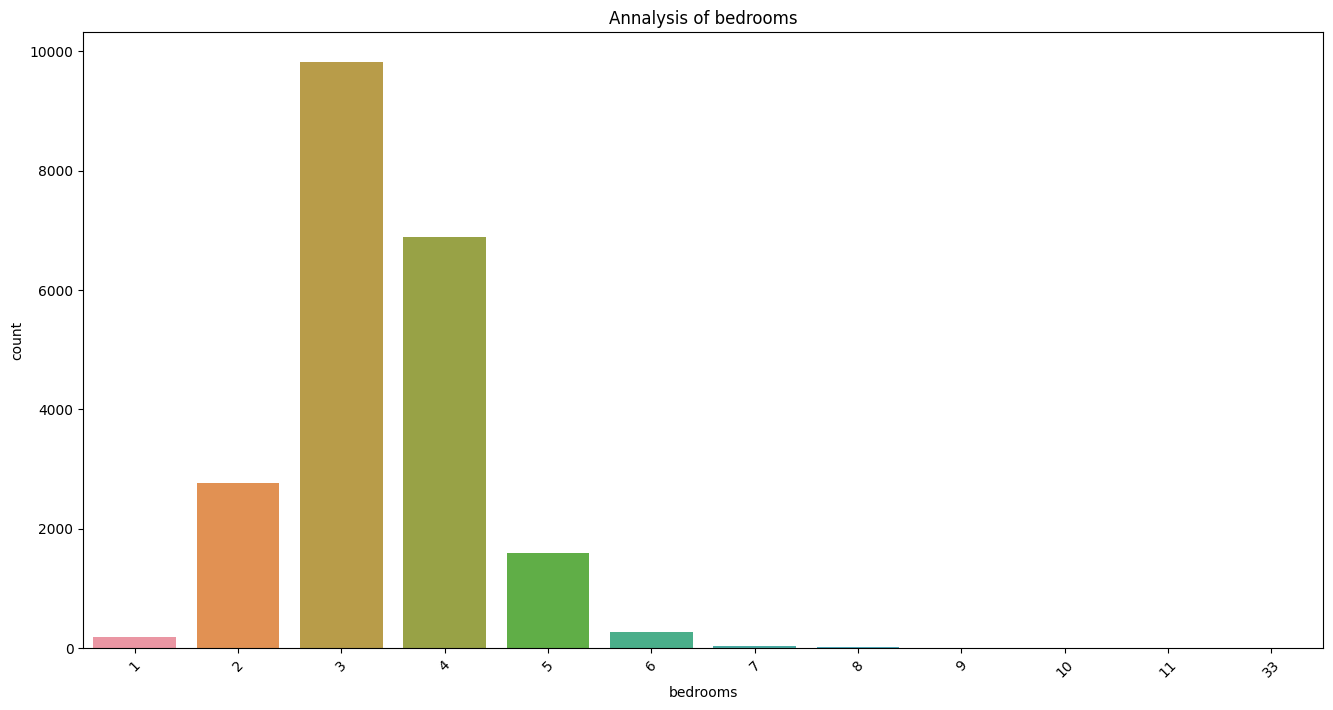

In [121]:
graph.univariate(df, 'bedrooms')

Houses with three bedrooms has the highest count, followed by 4 bedroom and the n 2 bedroom houses.

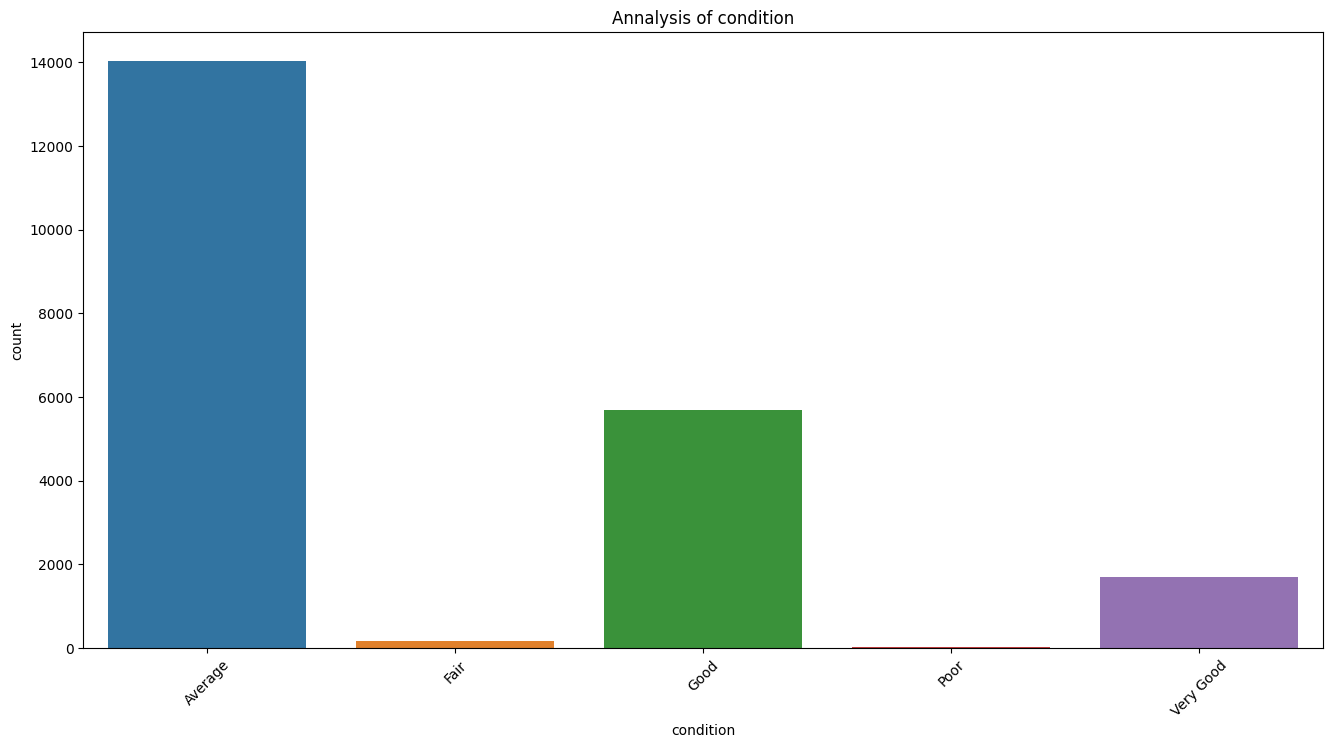

In [122]:
graph.univariate(df, 'condition')

Many houses are of Average condition. We have few houses with poor condition


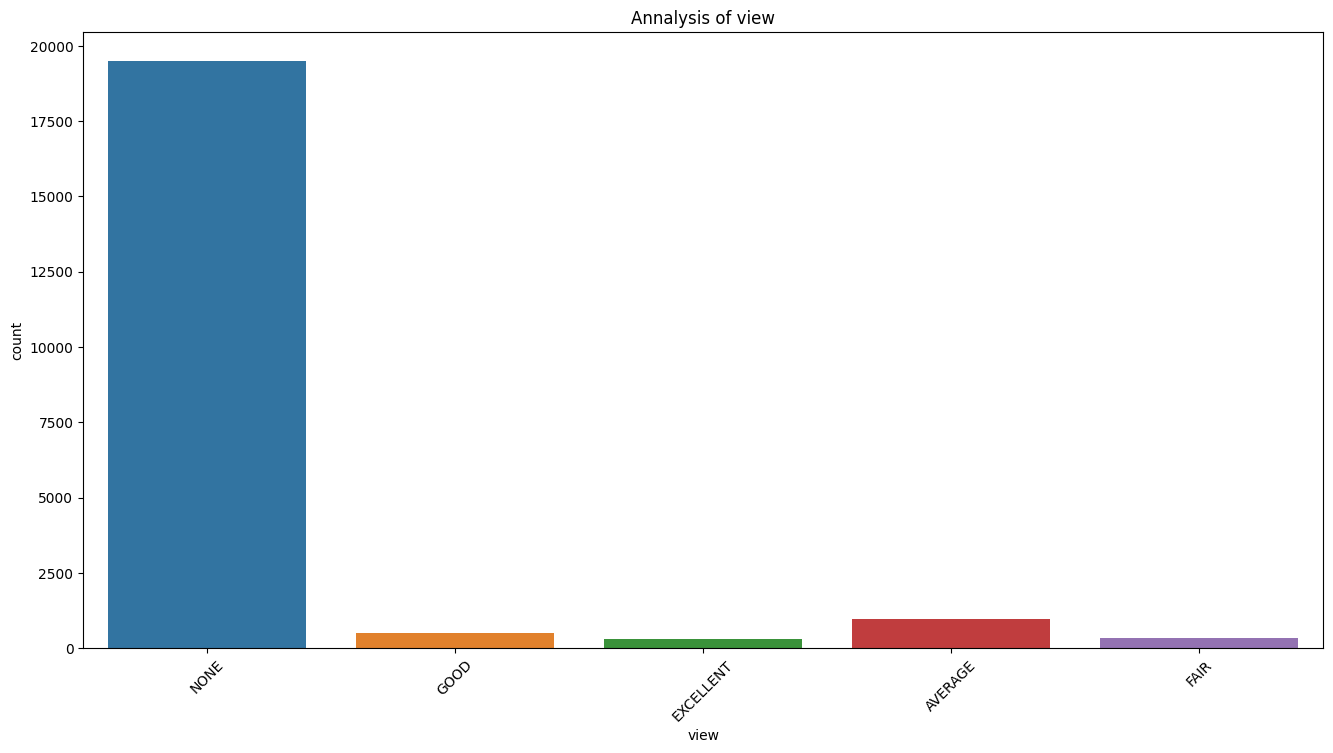

In [123]:
graph.univariate(df, 'view')

Many houses have no view

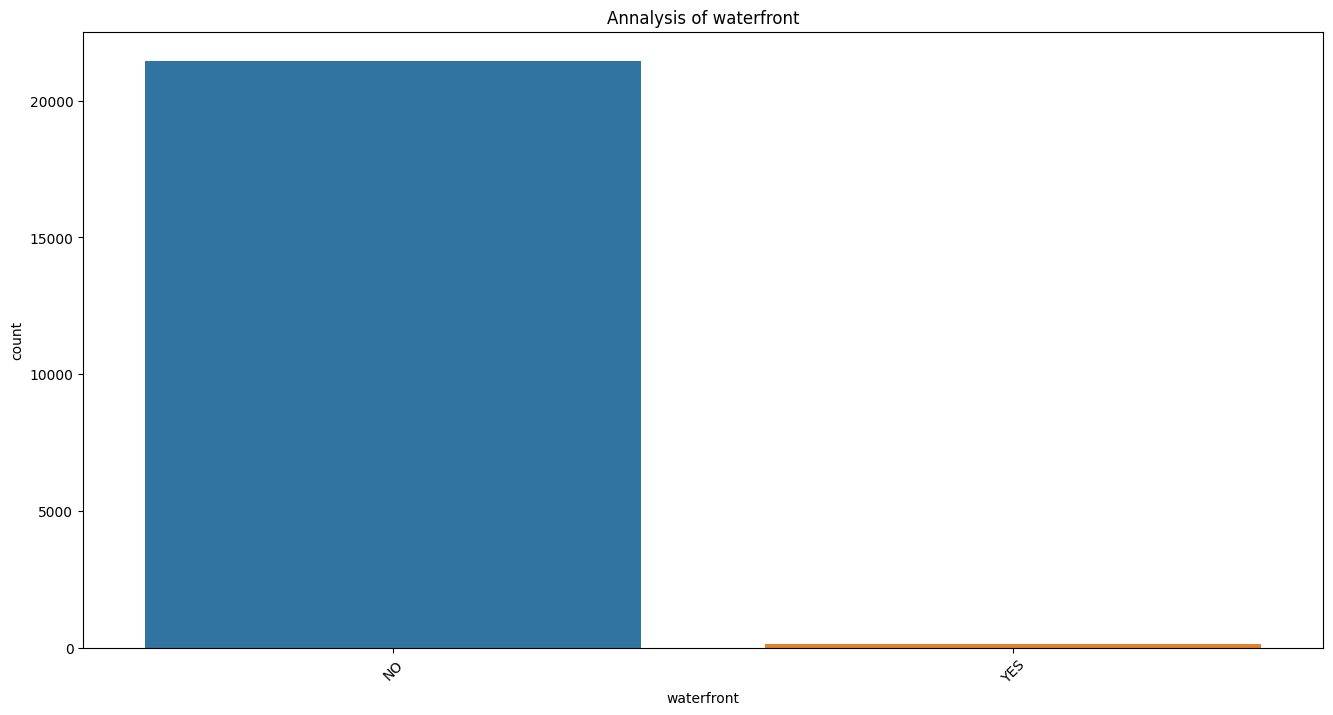

In [124]:
graph.univariate(df, 'waterfront')

Houses with no waterfront have the highest count

In [126]:
#rounding off the bathroom column to the nearest whole numbers
df["bathrooms"] = df["bathrooms"].round()

print(df)

            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3        1.0         1180      5650   
1     2014-12-09  538000.0         3        2.0         2570      7242   
2     2015-02-25  180000.0         2        1.0          770     10000   
3     2014-12-09  604000.0         4        3.0         1960      5000   
4     2015-02-18  510000.0         3        2.0         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3        2.0         1530      1131   
21593 2015-02-23  400000.0         4        2.0         2310      5813   
21594 2014-06-23  402101.0         2        1.0         1020      1350   
21595 2015-01-16  400000.0         3        2.0         1600      2388   
21596 2014-10-15  325000.0         2        1.0         1020      1076   

       floors waterfront  view  condition    grade  yr_built  yr_renovated  \
0         1.0         NO  NONE   

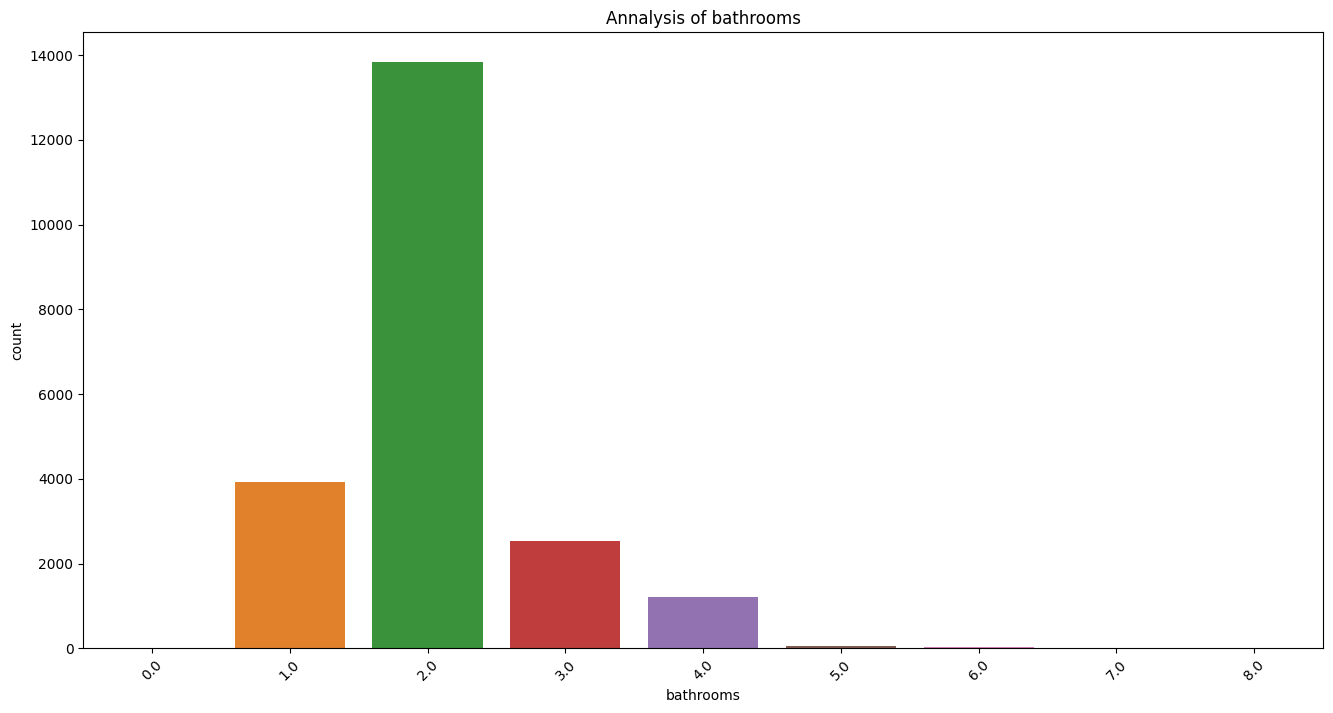

In [132]:
graph.univariate( df, 'bathrooms')

Many houses have 2 bathrooms, followed by houses with 1 bathroom , then houses with 3 bathrooms then the ones with 4 bathrooms

#### Bivariate analysis


Bivariate analysis is a statistical method for analyzing the relationship between two variables. It is used to examine the relationship between two variables to see if there is a correlation or association between them. 

In [139]:
graph.bivariate(df, 'price', 'bathrooms')